In [1]:
import numpy as np
import pandas as pd
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.regression.linear_model as sm

## Data load and cleanup.

In [2]:
dataframe_input = pd.read_csv("data1.csv")

In [3]:
dataframe_input.head()

,GEO_CODE,GEO_LABEL,socialrented,Noqualifications,Car_or_van,Deprivation_classification_of_household,%obese,Unnamed: 7,Unnamed: 8
0,E05000026,Abbey,2987.0,1580.0,2585.0,1923.0,27.076684,NaN,NaN
1,E05000455,Abbey,1392.0,877.0,1963.0,1320.0,16.990453,NaN,NaN
2,E05001260,Abbey,1117.0,2081.0,1635.0,1447.0,24.440527,NaN,NaN
3,E05001767,Abbey,2681.0,2647.0,2598.0,2093.0,26.490546,NaN,NaN
4,E05001784,Abbey,4978.0,3952.0,2418.0,2131.0,10.714286,NaN,NaN


In [4]:
dataframe_input = dataframe_input.drop(columns=["Unnamed: 7", "Unnamed: 8"])

In [5]:
dataframe_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7679 entries, 0 to 7678
Data columns (total 7 columns):
GEO_CODE                                   7679 non-null object
GEO_LABEL                                  7679 non-null object
socialrented                               7678 non-null float64
Noqualifications                           7678 non-null float64
Car_or_van                                 7678 non-null float64
Deprivation_classification_of_household    7678 non-null float64
%obese                                     7409 non-null float64
dtypes: float64(5), object(2)
memory usage: 420.1+ KB


In [6]:
dataframe_input = dataframe_input.fillna(0)

In [7]:
dataframe_input.columns

Index(['GEO_CODE', 'GEO_LABEL', 'socialrented', 'Noqualifications ',
       'Car_or_van', 'Deprivation_classification_of_household', '%obese'],
      dtype='object')

## Normalise the data so we can run machine learning algorithms on it

In [8]:
dataframe_numeric_columns = ['socialrented', 'Noqualifications ', 'Car_or_van', 'Deprivation_classification_of_household','%obese']
numerical_df = dataframe_input[dataframe_numeric_columns] 


In [9]:
numerical_df

,socialrented,Noqualifications,Car_or_van,Deprivation_classification_of_household,%obese
0,2987.0,1580.0,2585.0,1923.0,27.076684
1,1392.0,877.0,1963.0,1320.0,16.990453
2,1117.0,2081.0,1635.0,1447.0,24.440527
3,2681.0,2647.0,2598.0,2093.0,26.490546
4,4978.0,3952.0,2418.0,2131.0,10.714286
5,991.0,538.0,1696.0,1124.0,26.561672
6,1916.0,1310.0,2844.0,2308.0,22.382671
7,656.0,1266.0,681.0,1181.0,12.543554
8,3569.0,1618.0,1405.0,1244.0,18.852459
9,451.0,626.0,109.0,534.0,13.934426


In [10]:
from sklearn import preprocessing
x = numerical_df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_normalised = pd.DataFrame(x_scaled)

## Graph data

In [11]:
df_normalised.columns = dataframe_numeric_columns

In [12]:
df_normalised.head()

,socialrented,Noqualifications,Car_or_van,Deprivation_classification_of_household,%obese
0,0.210545,0.175770,0.288344,0.282836,0.781736
1,0.098118,0.097564,0.218963,0.194146,0.490535
2,0.078734,0.231505,0.182376,0.212825,0.705627
3,0.188976,0.294471,0.289794,0.307839,0.764814
4,0.350885,0.439648,0.269716,0.313428,0.309334


In [13]:
df_normalised.to_csv('normalised.csv')

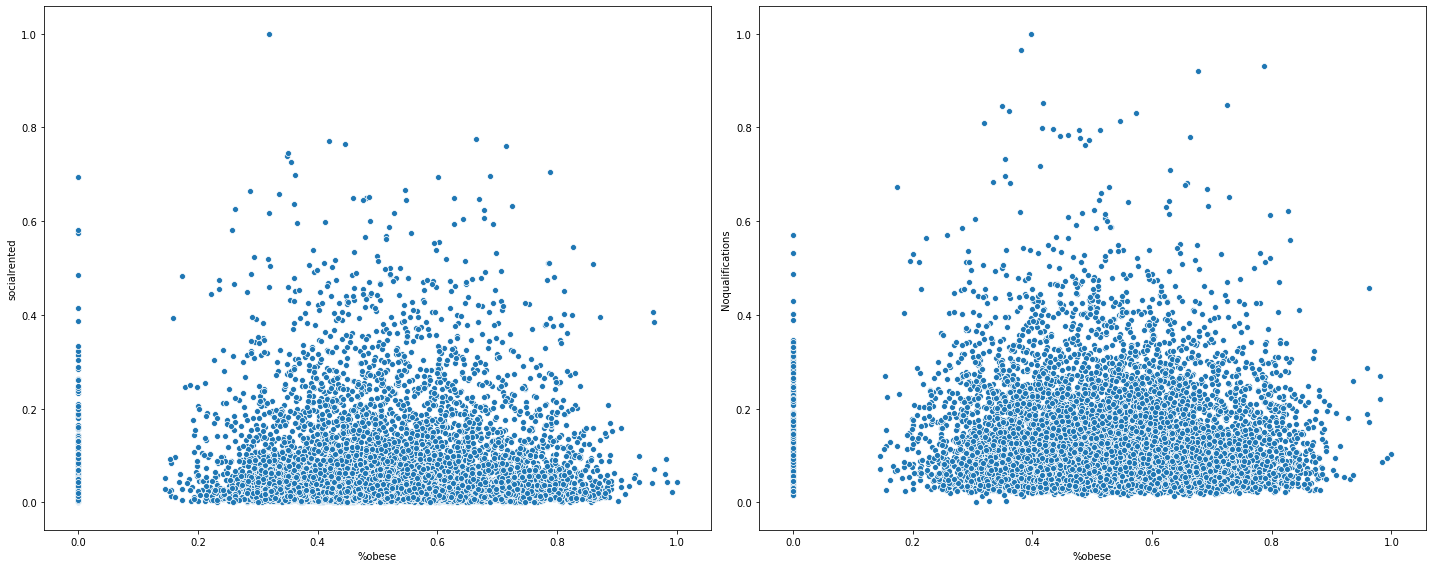

In [14]:
%matplotlib inline
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,8))
#sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(x = '%obese', y ='socialrented', data = df_normalised, ax=ax1)
sns.scatterplot(x = '%obese', y ='Noqualifications ', data = df_normalised, ax=ax2)
plt.tight_layout() 
plt.show()

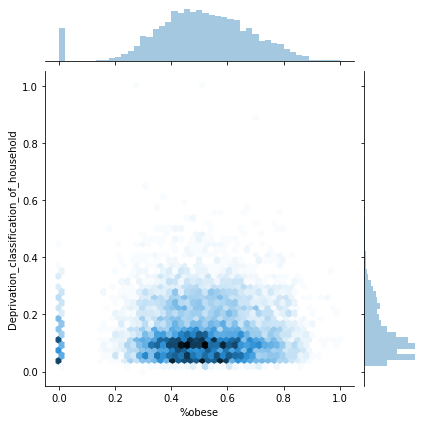

In [14]:
sns.jointplot("%obese", "Deprivation_classification_of_household", data=df_normalised, kind="hex")

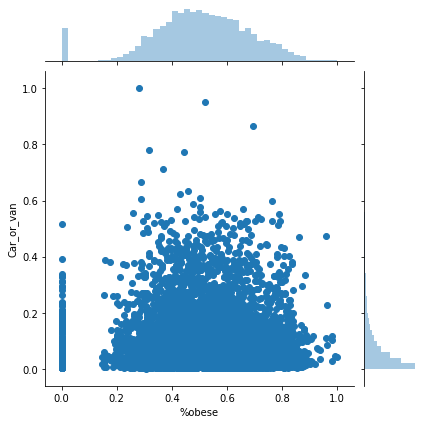

In [15]:
sns.jointplot(x="%obese", y="Car_or_van", data=df_normalised)

## Regression model

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import label
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
# Scale data using the MinMax Scaler.
scaler = MinMaxScaler()
DF_Scaled_1 = scaler.fit_transform(df_normalised[dataframe_numeric_columns])
DF_Scaled_1 = pd.DataFrame(data=DF_Scaled_1, columns=df_normalised[dataframe_numeric_columns].columns)

In [18]:
# Make X and y
y = DF_Scaled_1['%obese']
DF_Scaled_1 = DF_Scaled_1.drop('%obese', axis = 1)
X = DF_Scaled_1

In [21]:
# split the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)
    
logit = sm.OLS(np.array(y_train), np.array(X_train))
    
    # Fit the model
result = logit.fit()

In [22]:
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.683
Model:                            OLS   Adj. R-squared (uncentered):              0.683
Method:                 Least Squares   F-statistic:                              3096.
Date:                Thu, 22 Aug 2019   Prob (F-statistic):                        0.00
Time:                        22:13:45   Log-Likelihood:                         -1294.1
No. Observations:                5759   AIC:                                      2596.
Df Residuals:                    5755   BIC:                                      2623.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Number of obs – This is the number of observations used in the regression analysis.

F(  4,   195) – This is the F-statistic is the Mean Square Model (2385.93019) divided by the Mean Square Residual (51.0963039), yielding F=46.69.  The numbers in parentheses are the Model and Residual degrees of freedom are from the ANOVA table above.

Prob > F – This is the p-value associated with the above F-statistic.  It is used in testing the null hypothesis that all of the model coefficients are 0.

R-squared – R-Squared is the proportion of variance in the dependent variable (science) which can be explained by the independent variables (math, female, socst and read).  This is an overall measure of the strength of association and does not reflect the extent to which any particular independent variable is associated with the dependent variable.

Adj R-squared – This is an adjustment of the R-squared that penalizes the addition of extraneous predictors to the model.  Adjusted R-squared is computed using the formula 1 – ((1 – Rsq)((N – 1) /( N – k – 1)) where k is the number of predictors. 

Root MSE – Root MSE is the standard deviation of the error term, and is the square root of the Mean Square Residual (or Error). 

Coef. – These are the values for the regression equation for predicting the dependent variable from the independent variable. The regression equation is presented in many different ways, for example:

Std. Err. – These are the standard errors associated with the coefficients. 



In [23]:
DF_Scaled_1.columns

Index(['socialrented', 'Noqualifications ', 'Car_or_van',
       'Deprivation_classification_of_household'],
      dtype='object')

# Conclusion:


We ran a regression model in order to investigate the relationship the dependent variable, which is obesity, and the independent variables which are the number of people with no qualification, the number of people with no access to a car or van, the number of households which a socially rented and the proportion of households which are classed as deprived.

We have very promising results: **0.683** R-Squared meaning our model fitted 68%.

The R squared tell us the proportion of variance in the dependent variable, which isobesity, can be explained by the independent variables. This is an overall measure of the strength of association and does not relect the extent to which any particular independent variable is associated with the dependent variable.


The coefficient column tells us how independent variables are dependent on the selected variable %obese. We can see that:

**Coefficient**
- socialrented: **0.5720**
- Deprivation_classification_of_household: **4.5348**

The coefficient of the number of households which are socially rented is 0.57. The coefficient tells us the extent to which the independent variable, in this case the number of socially rented households, predicts the dependent variable which is obesity.


The coefficient of the number of households which are classed as deprived is 4.53.So as the coefficient is usually capped at a value of one this means that the model has overfit. Overfitting refers to a model which models the training fata too well, Therefore the models has learnt thr detail and noise in the training data to the extent that it negatively impact the perfomance of the model. Overfitting is a common problem in machine learning and data science. To avoid overfitting, we would ideally have more time to enable cross validation to be conducted, we could also train more data or utilise a technique known as bagging which employs a relatively unconstrained model to smooth out predictions.

